In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import io

In [2]:
# load the customer query data
from google.colab import files
uploaded = files.upload()



Saving customer_support_tickets.csv to customer_support_tickets.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['customer_support_tickets.csv']))


In [49]:
# dropping rows with empty values
df2=df.dropna().reset_index(drop=True)

# selecting 100 rows to check on scatter plot
df2=df2[:100]

In [62]:
#remove all the records where 'Time to Resolution' is greater than 'First Response Time'
df_final = df2[df2['First Response Time']>df2['Time to Resolution']]



***Use label encoding or one-hot encoding to convert categorical data to numerical values. For your use case, label encoding is more suitable since priority levels can be ordered.***

In [ ]:
# label encoding as 'Ticket Priority' is categorical
label_encoder = LabelEncoder()
df_final['Priority'] = label_encoder.fit_transform(df_final['Ticket Priority'])


In [66]:
# calculating no. of hours on resolution time
from datetime import datetime
from_time = pd.to_datetime(df_final['Time to Resolution'])

to_time = pd.to_datetime(df_final['First Response Time'])
date_diff = to_time - from_time


In [ ]:
df_final['Resolve Hours'] = date_diff.dt.total_seconds() / 3600

In [68]:
df_final.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority,Resolve Hours,Cluster
1,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2,5.533333,3
3,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,1,17.916667,0
4,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,1,2.633333,3
5,15,Amy Hill,medinasteven@example.net,48,Female,Sony PlayStation,2020-02-29,Billing inquiry,Product setup,I'm having an issue with the {product_purchase...,Closed,Officer moment world sing parent available.,High,Chat,2023-06-01 06:22:55,2023-05-31 23:08:55,4.0,1,7.233333,3
6,17,Julia Salazar,watkinsbarbara@example.com,63,Other,Xbox,2021-10-13,Product inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Seek evidence book collection catch.,Critical,Chat,2023-06-01 19:46:59,2023-06-01 15:58:59,4.0,0,3.800000,3


In [69]:

#X = df.iloc[:,[17,18,16]].values
X = df_final[['Priority', 'Resolve Hours','Customer Satisfaction Rating']]




<class 'pandas.core.frame.DataFrame'>


In [ ]:
# finding wcss(within cluster sum of squares) value for different number of clusters

wcss = []

for i in range(1,9):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

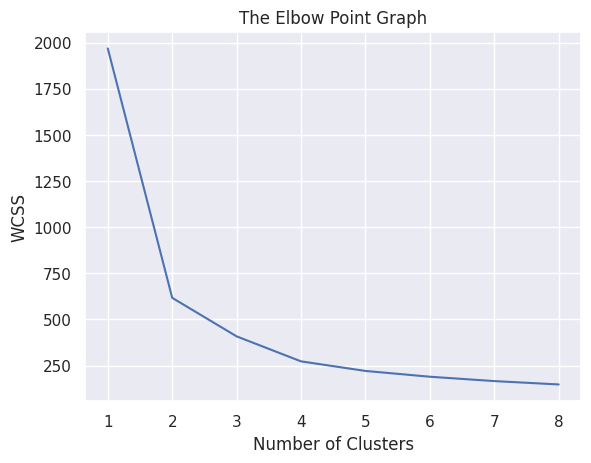

In [72]:
# ploting an elbow graph

sns.set()
plt.plot(range(1,9), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:

# Apply K-means
kmeans = KMeans(n_clusters=4, random_state=42)

#Ensure the number of cluster assignments matches the number of rows in the DataFrame.
df_final['Cluster'] = kmeans.fit_predict(X)

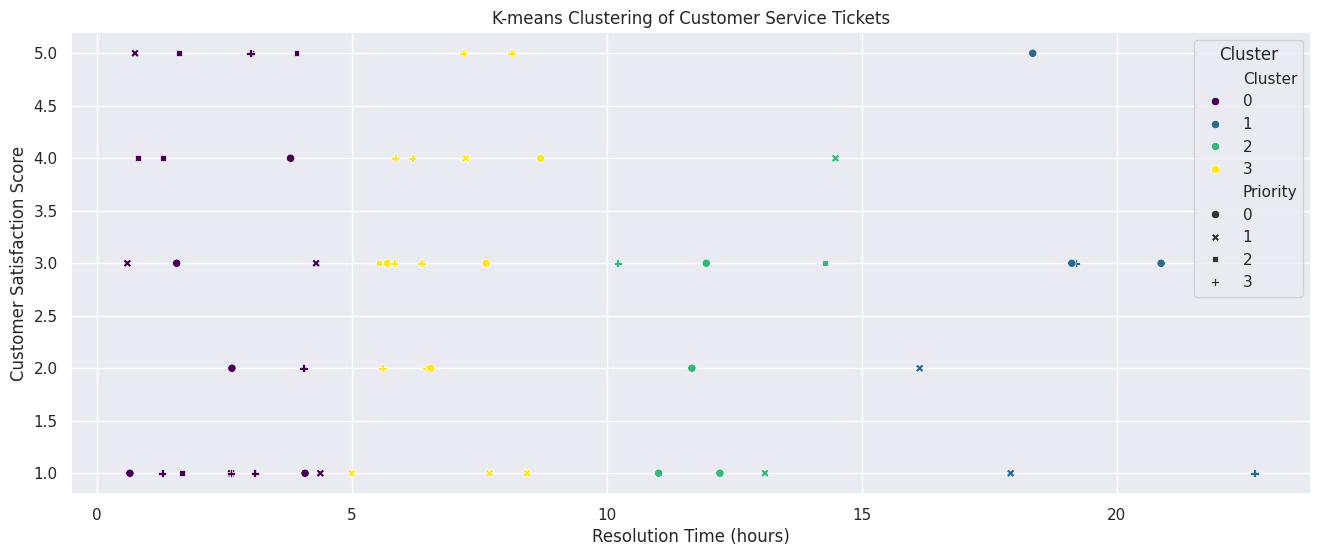

In [74]:
# Plotting the clusters
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_final, x='Resolve Hours', y='Customer Satisfaction Rating', hue='Cluster', palette='viridis', style='Priority')
plt.title('K-means Clustering of Customer Service Tickets')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Customer Satisfaction Score')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# We can see most of the high priority tickets are clustered together & has better resolution time

[link text](https://)